In [1]:
import os
from astropy.io import fits
from dcf_python import *
# plt.rcParams.update({'font.size': 16})


<h3>This is where you load in the region of your calculation</h3>

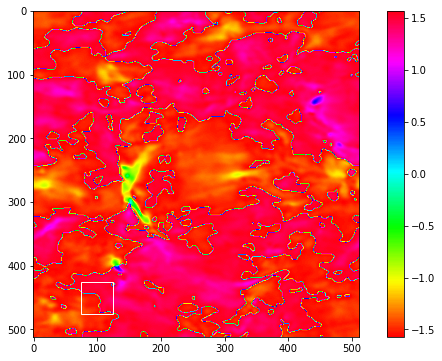

In [3]:
## Loading the polarization angle data
data = fits.open("L1M10_0.1.fits")[0].data

## Coordinates and Size ##
y_cen = (450) 
x_cen = (100) 
rad = 50

# Taking a smaller region from the entire map. 
data_region = data_cut(x_cen, y_cen, rad, data, show=True)

# Calculating the structure function analysis of the smaller region.
dr, dphi = cos_disp_calculations(data_region, ds_scale=1)

<h3>The MDCF fit to obtain the correlation length and uncorrected field strength ratio.</h3>

Y-intercept (Uncorrected Turbulent-Ordered Ratio):  0.004842953310054083
[ Amplitude  Sigma ]
Gaussian parameters are:  [ 0.00479994 -0.29238988]
FWHM:  -0.6871162186196907
Number of Bins:  25.0
Analytic Turbulent Corrleation Length:  0.26646885227579126


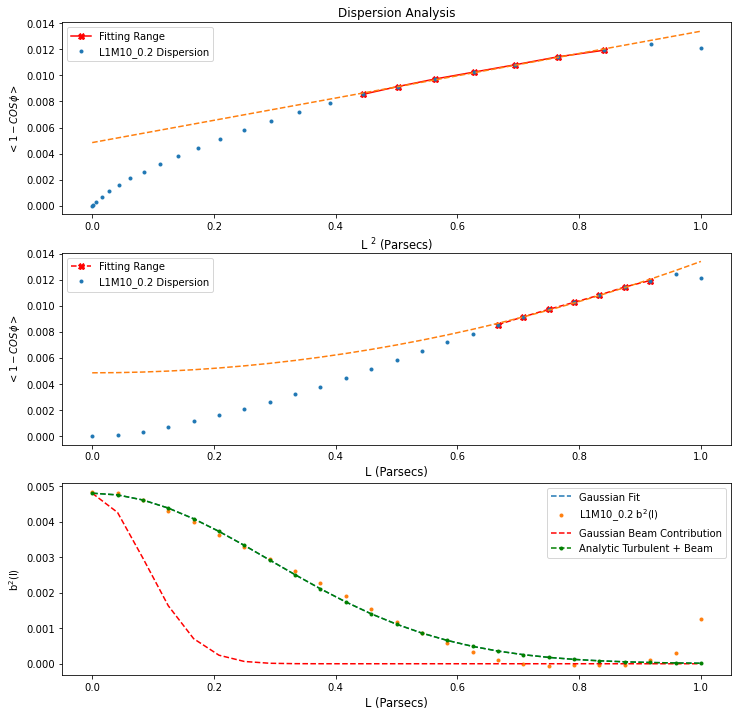

In [7]:
# These values correspond to the fitting range shown below in the plots.
fit0_01 = 16
fitf_01 = 23

uncorrected_turbulent_ratio, turb_cof = MDCF_fit(dr, dphi, 'L1M10_0.2', edge_length=1.0, \
                                         beam_res=0.2, fit0=fit0_01, fitf=fitf_01, beam=True)


<h3> Calculating the Turbulent Cells and Corrected Turbulent to Ordered Ratio<h3>

In [8]:
N = turbulent_cells(turb_cof, 1.45, 0.2/2.35)
print("Turbulent Cells:", round(N))

print("Corrected Turbulent to Ordered Ratio")
print("------------------------------------")
if N > 1:
    print(np.sqrt(round(N) * uncorrected_turbulent_ratio))
else:
    print(np.sqrt(uncorrected_turbulent_ratio))

Turbulent Cells: 3
Corrected Turbulent to Ordered Ratio
------------------------------------
0.12053572055686335
